<a href="https://colab.research.google.com/github/AmanPriyanshu/literate-train/blob/master/adaptive_ddos_detector_design_using_fast_entropy_computation_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaptive DDoS Detector Design Using Fast Entropy Computation Method

```console
@INPROCEEDINGS{5976144,
  author={G. {No} and I. {Ra}},
  booktitle={2011 Fifth International Conference on Innovative Mobile and Internet Services in Ubiquitous Computing}, 
  title={Adaptive DDoS Detector Design Using Fast Entropy Computation Method}, 
  year={2011},
  volume={},
  number={},
  pages={86-93},}
```

## INTRODUCTION:
Fast Entropy shows the significant reduce of computational time compared to conventional entropy computation while it maintains detection accuracy. However, Fast Entropy needs the manual threshold settings during detection process which is not realistic in real detection facility. The paper introduces adaptive detector with dynamic detection window size and adaptive threshold shifting using Fast Entropy, called AFEA (Adaptive DDoS attack detection using Fast Entropy Approach). 

 Suppose X is a discrete random variable with alphabet χ and the probability mass function p(x) = Pr {X=x}, x∈ χ. Then, the entropy H(X) of a discrete random
variable X can be defined as:

H(X) = - Σ p(x) log p(x), where x ∈ χ

## Fast-Entropy:
The Fast Entropy Approach is developed as follows:

Let, entropy, H, be a quantity of disorder that represent the number of different types of symbols. Thus, the value of H must be increased when the disorder is increased. We can simplify the expression of entropy as follows:

> H = log (the number of possible states within input information)

Instead of using probabilities to compute H to express quantity of disorder, we use only the number of different types of symbols. We redefine the entropy as

> H = log (the number of possible system states),

where, possible state means the number of distinct
packets in the system.

However, this approach is not able to show the total number of being appeared symbols, which does not allow us effectively detect attacks when an attacker significantly increases the number of different symbols (packets) to paralyze a victim’s system by saturating a victim’s system capacity during DDoS attack.

To overcome this weakness, we add the total number of symbols into the modified entropy, H’, and redefine entropy as:

> H' = - log(m/n) = log(n/m)

where, m is the number distinct packets, n is total number of packets in an input. 

However, this new entropy could still increase the false negatives if attackers increase both the number of packets, and the number of packet types simultaneously. In that case, the ratio: `n/m` will not be changed noticeably, and the entropy value will stay almost same, which makes the algorithm
miss attacks. To minimize the false negatives, we proposed an entropy calibration factor.

Suppose n[i] is the total number of packets in monitoring interval t[i], and consider two monitor variables, n[i-1] and n[i] at time t[i-1] and t[i] respectively . Then, the calibration entropy, H", can be defined as follows:

> H" = | logs( n[i-1]/n[i] ) | , if n[i] >= n[i-1]

> H" = | logs( n[i]/n[i-1] ) | , if n[i] < n[i-1]

> t =  | logs( n[i-1]/n[i] ) | , if n[i] >= n[i-1]

> t = | logs( n[i]/n[i-1] ) | , if n[i] < n[i-1]

> H' = - log (m/n) + t

where, m is the number distinct packets, n is total number of packets in an input, and is packet number calibration factor (same as H"). 

## Adative DDoS Attack Aecteor:

 For detecting DDoS attacks in real time, an intrusion detection system should continuously monitor entropy values sequentially per every monitoring interval, called window size. If we have a monitoring interval of t seconds, we monitor the entropy value for k×t seconds where k is the size of Moving Average Window. In every monitoring interval t, an entropy value is computed.

 Let’s define as follows:
* μi: i-th average of Moving Average Window
* σ: Standard Deviation of H[n-m] ~ H[n-1] with μi
* Di: absolute value of difference between μi and H[n] (i.e., Di = | μi - H[n] | )
* β: threshold multiplication factor, positive integer value (default β = 3)
* ω: threshold (ω = β * σ) 

The β will be changed under the following rules:
* If Hn > 1.5 μi, then increase β by 1
* If 0.5 μi ≤ Hn ≤ 1.5 μi, then maintain current β
* If Hn < 0.5 μi, then decrease β by 1 

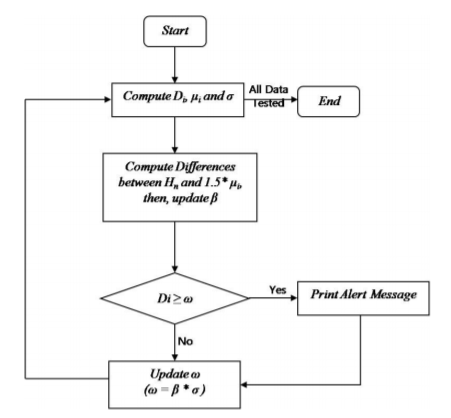

SDMAW works as follows;
* The detector has one MAW.
* Four detection criteria (source IP address, destination IP address, source port, and destination port entropy) share the MAW size.
* Whenever an attack occur, the size of SDMAW increased by 1
* If the channel shows normal condition during 30 detection periods in a row,the size of SDMAW is decreased by 1. 

The detector manages the size of each MDMAW size. The size of individual MDMAW_TS changes its value whenever a threshold value changes.
MDMAW_TS works
as follows;
* The detector has four MAWs to monitor the channel condition of source IP address, destination IP address, source port, and destination port entropy respectively.
* If β has a positive shift, the size of MDMAW is increased by 1, respectively.
If β has a negative shift, the size of MDMAW is decreased by 1, respectively
* If β has no shift, the size of MDMAW is maintained with same size. 